In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import tuner

In [80]:
#data = np.load("2022_11_18__14_37_19_Gitatte E tief.npy")
data = np.load("2022_11_18__14_37_30_Gitatte E tief.npy")
t = data[0,:]
s = data[1,:]
tmax = t[-1]

target_freq = tuner.util.note_to_freq(note='e', level=-2, freq_a=440)
dt = 1/target_freq
print("E - {:.2f}Hz (T={:.2f}ms)".format(target_freq, dt*1000))

E - 82.41Hz (T=12.13ms)


Text(0.5, 1.0, 'tuner buffer dump - guirate E string')

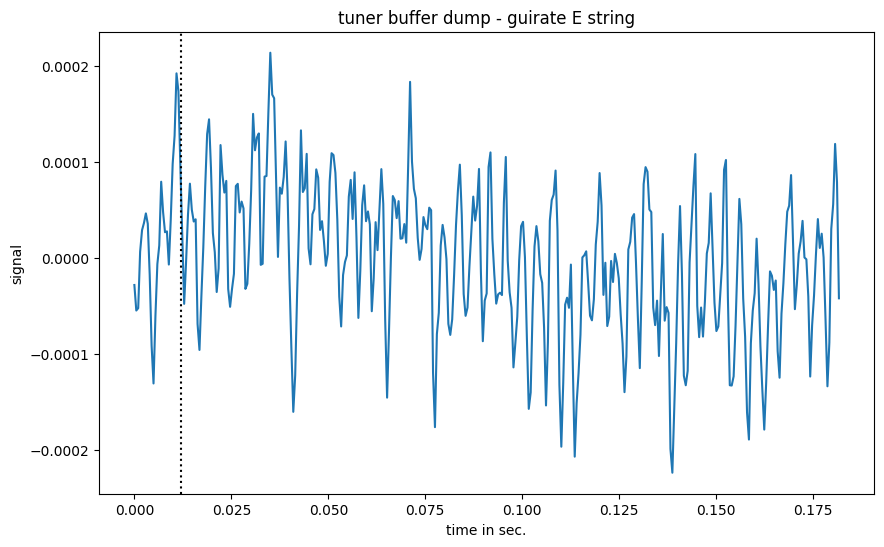

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
axc = ax
axc.plot(t, s)
axc.axvline(dt, color='k', ls=':')

axc.set_ylabel("signal")
axc.set_xlabel("time in sec.")
axc.set_title("tuner buffer dump - guirate E string")

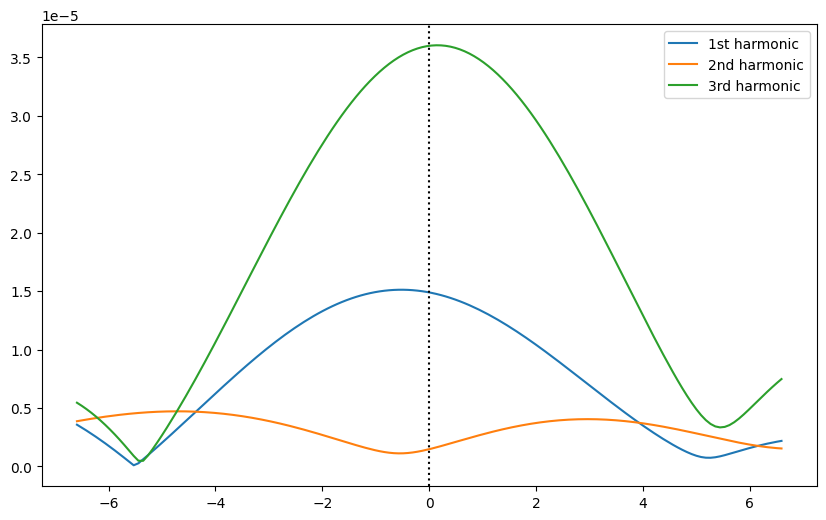

In [82]:
dw = 0.08*target_freq
w1 = 2*np.pi*np.linspace(target_freq-dw, target_freq+dw, 150)
w2 = 2*np.pi*np.linspace(2*target_freq-dw, 2*target_freq+dw, 150)
w3 = 2*np.pi*np.linspace(3*target_freq-dw, 3*target_freq+dw, 150)
s_w1 = 1/tmax*tuner.util.fourier_int_array(s, t, w1)
s_w2 = 1/tmax*tuner.util.fourier_int_array(s, t, w2)
s_w3 = 1/tmax*tuner.util.fourier_int_array(s, t, w3)

fig, ax = plt.subplots(figsize=(10,6))
axc = ax
axc.plot(w1/(2*np.pi) - 1*target_freq, np.abs(s_w1), label='1st harmonic')
axc.plot(w2/(2*np.pi) - 2*target_freq, np.abs(s_w2), label='2nd harmonic')
axc.plot(w3/(2*np.pi) - 3*target_freq, np.abs(s_w3), label='3rd harmonic')

axc.legend()
axc.axvline(0, color='k', ls=':')

0: a=0.00, phi=0.24 pi
1: a=0.00, phi=0.89 pi
2: a=0.00, phi=0.63 pi
omega base from fit. 82.43749398563557


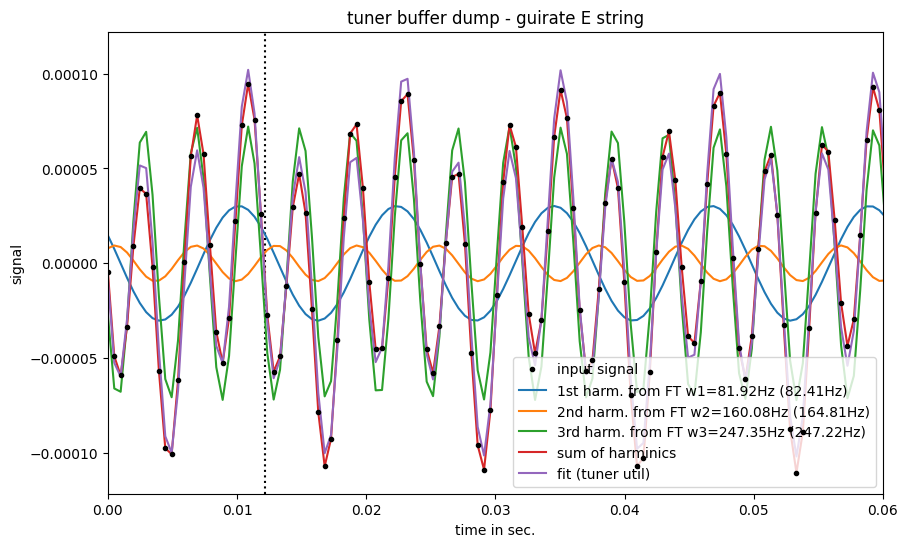

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
axc = ax
axc.plot(t, s, label="input signal", color='k', ls='', marker='.', zorder=10)
axc.axvline(dt, color='k', ls=':')

idx1 = np.argmax(np.abs(s_w1))
w1max = w1[idx1]
a1 = 2*np.abs(s_w1[idx1])
phi1 = np.angle(s_w1[idx1])
axc.plot(t, a1*np.cos(w1max*t + phi1), label="1st harm. from FT w1={:.2f}Hz ({:.2f}Hz)".format(
    w1max/2/np.pi, target_freq)
)

idx2 = np.argmax(np.abs(s_w2))
w2max = w2[idx2]
a2 = 2*np.abs(s_w2[idx2])
phi2 = np.angle(s_w2[idx2])
axc.plot(t, a2*np.cos(w2max*t + phi2), label="2nd harm. from FT w2={:.2f}Hz ({:.2f}Hz)".format(
    w2max/2/np.pi, 2*target_freq)
)

idx3 = np.argmax(np.abs(s_w3))
w3max = w3[idx3]
a3 = 2*np.abs(s_w3[idx3])
phi3 = np.angle(s_w3[idx3])
axc.plot(t, a3*np.cos(w3max*t + phi3), label="3rd harm. from FT w3={:.2f}Hz ({:.2f}Hz)".format(
    w3max/2/np.pi, 3*target_freq)
)

s = a1*np.cos(w1max*t + phi1) + a2*np.cos(w2max*t + phi2) + a3*np.cos(w3max*t + phi3)
axc.plot(t, s, label="sum of harminics")


omg_base, amp, phi, r = tuner.util.fit_harmonic_function(s, t, target_freq*2*np.pi, N=3)
for i in range(len(amp)):
    print("{}: a={:.2f}, phi={:.2f} pi".format(i, amp[i], phi[i]/np.pi))
print("omega base from fit.", omg_base/2/np.pi)
s_fit = tuner.util.n_harmonic_function(t, omg_base, amp, phi)
axc.plot(t, s_fit, label="fit (tuner util)")

axc.set_ylabel("signal")
axc.set_xlabel("time in sec.")
axc.set_title("tuner buffer dump - guirate E string")
axc.set_xlim([0, 0.06])
axc.legend()